In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier as KNC

In [3]:
titanic_data = pd.read_csv("titanic.csv")
titanic_data.head(5)
titanic_data.tail(5)

,Passenger_id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
1304,1305,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,C
1305,1306,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,C
1306,1307,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,C
1307,1308,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,C
1308,1309,3,0,"Zimmerman, Mr. Leo",male,29,0,0,315082,7.875,S


In [4]:
print("No. of passengers in original dataset:" +str(len(titanic_data.index)))

No. of passengers in original dataset:1309


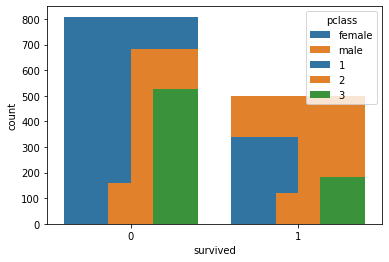

In [5]:
sns.countplot(x="survived",data=titanic_data)

sns.countplot(x="survived",hue="sex",data=titanic_data)

sns.countplot(x="survived",hue="pclass",data=titanic_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Passenger_id  1309 non-null   int64 
 1   pclass        1309 non-null   int64 
 2   survived      1309 non-null   int64 
 3   name          1309 non-null   object
 4   sex           1309 non-null   object
 5   age           1309 non-null   object
 6   sibsp         1309 non-null   int64 
 7   parch         1309 non-null   int64 
 8   ticket        1309 non-null   object
 9   fare          1309 non-null   object
 10  embarked      1309 non-null   object
dtypes: int64(5), object(6)
memory usage: 112.6+ KB


(array([1002.,  170.,  113.,    8.,    6.,    6.,    2.,    0.,    0.,
           2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

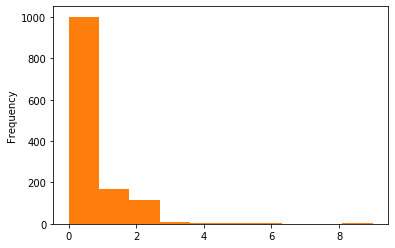

In [6]:
titanic_data.info()
titanic_data["parch"].plot.hist()
plt.hist(titanic_data["parch"])

In [7]:
titanic_data["age"] = pd.to_numeric(titanic_data.age, errors='coerce')
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger_id  1309 non-null   int64  
 1   pclass        1309 non-null   int64  
 2   survived      1309 non-null   int64  
 3   name          1309 non-null   object 
 4   sex           1309 non-null   object 
 5   age           1046 non-null   float64
 6   sibsp         1309 non-null   int64  
 7   parch         1309 non-null   int64  
 8   ticket        1309 non-null   object 
 9   fare          1309 non-null   object 
 10  embarked      1309 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 112.6+ KB


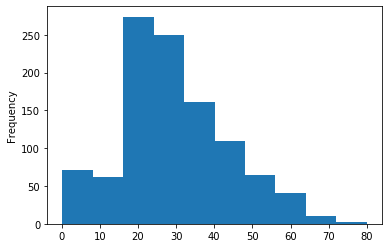

In [8]:
titanic_data["age"].plot.hist()

In [9]:
titanic_data["fare"] = pd.to_numeric(titanic_data.fare, errors='coerce')
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger_id  1309 non-null   int64  
 1   pclass        1309 non-null   int64  
 2   survived      1309 non-null   int64  
 3   name          1309 non-null   object 
 4   sex           1309 non-null   object 
 5   age           1046 non-null   float64
 6   sibsp         1309 non-null   int64  
 7   parch         1309 non-null   int64  
 8   ticket        1309 non-null   object 
 9   fare          1291 non-null   float64
 10  embarked      1309 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


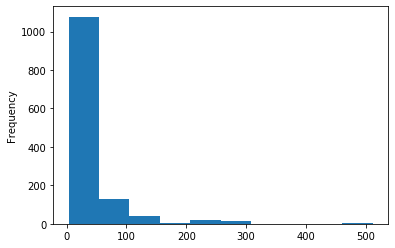

In [10]:
titanic_data["fare"].plot.hist()

In [11]:
titanic_data.isnull()
titanic_data.isnull().sum()

Passenger_id      0
pclass            0
survived          0
name              0
sex               0
age             263
sibsp             0
parch             0
ticket            0
fare             18
embarked          0
dtype: int64

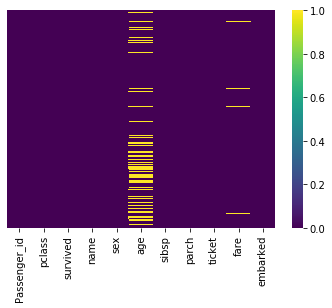

In [12]:
sns.heatmap(titanic_data.isnull(),yticklabels=False, cmap="viridis")

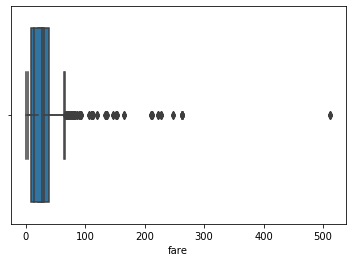

In [13]:
sns.boxplot(x="age",data=titanic_data)
sns.boxplot(x="fare",data=titanic_data)

In [14]:
titanic_data.head(5)

,Passenger_id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,48.0,1,2,113781,151.5500,S
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,S
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,S
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,?,151.5500,S


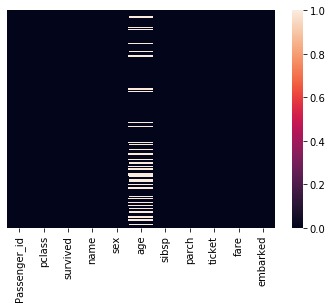

In [15]:
titanic_data.dropna(subset=['fare'],inplace=True)
sns.heatmap(titanic_data.isnull(),yticklabels=False)

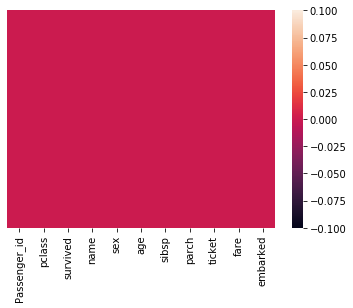

In [16]:
titanic_data["age"].fillna(titanic_data["age"].mean(), inplace=True)
sns.heatmap(titanic_data.isnull(),yticklabels=False)

In [17]:
titanic_data.isnull().sum()

Passenger_id    0
pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
dtype: int64

In [18]:
titanic_data.info()
pd.get_dummies(titanic_data["sex"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger_id  1291 non-null   int64  
 1   pclass        1291 non-null   int64  
 2   survived      1291 non-null   int64  
 3   name          1291 non-null   object 
 4   sex           1291 non-null   object 
 5   age           1291 non-null   float64
 6   sibsp         1291 non-null   int64  
 7   parch         1291 non-null   int64  
 8   ticket        1291 non-null   object 
 9   fare          1291 non-null   float64
 10  embarked      1291 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 121.0+ KB


,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [19]:
titanic_data.info()
pd.get_dummies(titanic_data["sex"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger_id  1291 non-null   int64  
 1   pclass        1291 non-null   int64  
 2   survived      1291 non-null   int64  
 3   name          1291 non-null   object 
 4   sex           1291 non-null   object 
 5   age           1291 non-null   float64
 6   sibsp         1291 non-null   int64  
 7   parch         1291 non-null   int64  
 8   ticket        1291 non-null   object 
 9   fare          1291 non-null   float64
 10  embarked      1291 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 121.0+ KB


,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [20]:
pd.get_dummies(titanic_data["sex"],drop_first=True)

,male
0,0
1,1
2,0
3,1
4,0
...,...
1304,0
1305,0
1306,1
1307,1


In [21]:
Sex_Dummy = pd.get_dummies(titanic_data["sex"],drop_first=True)
Sex_Dummy.head(5)

,male
0,0
1,1
2,0
3,1
4,0


In [22]:
pd.get_dummies(titanic_data["embarked"])
Embardked_Dummy = pd.get_dummies(titanic_data["embarked"],drop_first=True)
Embardked_Dummy.head(5)

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [23]:
pd.get_dummies(titanic_data["pclass"])
PClass_Dummy = pd.get_dummies(titanic_data["pclass"],drop_first=True)
PClass_Dummy.head(5)

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [24]:
titanic_data = pd.concat([titanic_data,Sex_Dummy,PClass_Dummy,Embardked_Dummy],axis=1)
titanic_data.head(5)

,Passenger_id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,2,3,C,Q,S
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,S,0,0,0,0,0,1
1,2,1,1,"Allison, Master. Hudson Trevor",male,48.0,1,2,113781,151.5500,S,1,0,0,0,0,1
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,S,0,0,0,0,0,1
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,S,1,0,0,0,0,1
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,?,151.5500,S,0,0,0,0,0,1


In [25]:
titanic_data.drop(["sex","embarked","pclass","Passenger_id","name","ticket"],axis=1,inplace=True)
titanic_data.head(5)

,survived,age,sibsp,parch,fare,male,2,3,C,Q,S
0,1,29.0,0,0,211.3375,0,0,0,0,0,1
1,1,48.0,1,2,151.5500,1,0,0,0,0,1
2,0,2.0,1,2,151.5500,0,0,0,0,0,1
3,0,30.0,1,2,151.5500,1,0,0,0,0,1
4,0,25.0,1,2,151.5500,0,0,0,0,0,1


In [26]:
x=titanic_data.drop("survived",axis=1)
y=titanic_data["survived"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [28]:
from sklearn.linear_model import LogisticRegression
help(LogisticRegression())
logmodel = LogisticRegression(solver='liblinear') #It is the default solver for Scikit-learn versions earlier than 0.22.0.
logmodel.fit(X_train, y_train)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
neigh = KNC(n_neighbors= 3)

In [48]:
from sklearn.metrics import roc_curve, auc

In [49]:
KNN = KNeighborsClassifier(" pclass")

In [61]:
ex_str='10'
ex_int=5
print(int( ex_str) < ex_int)

False


In [52]:
predictions = logmodel.predict(x_BE_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_BE_test,predictions)

array([[164,  31],
       [ 44,  84]], dtype=int64)

In [67]:
X=titanic_data.drop('survived', axis=1)
y=titanic_data.survived

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [71]:
kNN=KNeighborsClassifier()
kNN.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
y_pred=kNN.predict(X_test)

In [73]:
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.651
[[195  60]
 [ 89  83]]
0.5804195804195804
0.48255813953488375


In [29]:
predictions = logmodel.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[166,  29],
       [ 45,  83]], dtype=int64)

In [31]:
confusion_matrix(predictions,y_test)

array([[166,  45],
       [ 29,  83]], dtype=int64)

In [32]:
print(logmodel.coef_)

[[-0.02786268 -0.28441186 -0.00559802  0.00262196 -2.49991609 -0.73994587
  -1.73381638  0.96286814  0.41065974  0.4927828 ]]


In [33]:
print(logmodel.intercept_)

[2.33994657]


In [34]:
titanic_data_1 = titanic_data
titanic_data_1.head(5)

,survived,age,sibsp,parch,fare,male,2,3,C,Q,S
0,1,29.0,0,0,211.3375,0,0,0,0,0,1
1,1,48.0,1,2,151.5500,1,0,0,0,0,1
2,0,2.0,1,2,151.5500,0,0,0,0,0,1
3,0,30.0,1,2,151.5500,1,0,0,0,0,1
4,0,25.0,1,2,151.5500,0,0,0,0,0,1


In [35]:
import statsmodels.api as sm

In [36]:
x1=titanic_data_1.drop("survived",axis=1)
y1=titanic_data_1["survived"]
import numpy as nm
x1 = nm.append(arr = nm.ones((1291,1)).astype(int), values=x1, axis=1)

In [37]:
x_opt= x1[:, [0,1,2,3,4,5,6,7,8,9,10]]

In [38]:
regressor_OLS=sm.OLS(endog = y1, exog=x_opt).fit()

In [39]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     75.90
Date:                Thu, 02 Feb 2023   Prob (F-statistic):          5.35e-122
Time:                        19:11:37   Log-Likelihood:                -601.84
No. Observations:                1291   AIC:                             1226.
Df Residuals:                    1280   BIC:                             1282.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2710      0.279      4.560      0.000       0.724       1.818
x1            -0.0057      0.001     -6.077      0.000      -0.007      -0.004
x2            -0.0424      0.011     -3.721      0.000      -0.065      -0.020
x3            -0.0017      0.014     -0.118      0.906      -0.029       0.026
x4             0.0001      0.000      0.523      0.601      -0.000       0.001
x5            -0.4898      0.024    -20.674      0.000      -0.536      -0.443
x6            -0.1678      0.039     -4.313      0.000      -0.244      -0.091
x7            -0.3266      0.037     -8.850      0.000      -0.399      -0.254
x8            -0.1028      0.276     -0.373      0.709      -0.644       0.438
x9            -0.1740      0.278     -0.627      0.531      -0.719       0.371
x10           -0.1944      0.276     -0.705      0.481      -0.735       0.347
==============================================================================
Omnibus:                       51.414   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.039
Skew:                           0.515   Prob(JB):                     4.11e-13
Kurtosis:                       2.972   Cond. No.                     3.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
x_opt= x1[:, [0,1,2,4,5,6,7,8,9,10]]
regressor_OLS=sm.OLS(endog = y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     84.40
Date:                Thu, 02 Feb 2023   Prob (F-statistic):          5.69e-123
Time:                        19:11:39   Log-Likelihood:                -601.85
No. Observations:                1291   AIC:                             1224.
Df Residuals:                    1281   BIC:                             1275.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2714      0.279      4.564      0.000       0.725       1.818
x1            -0.0057      0.001     -6.079      0.000      -0.007      -0.004
x2            -0.0428      0.011     -3.938      0.000      -0.064      -0.021
x3             0.0001      0.000      0.509      0.611      -0.000       0.001
x4            -0.4893      0.023    -20.993      0.000      -0.535      -0.444
x5            -0.1683      0.039     -4.346      0.000      -0.244      -0.092
x6            -0.3272      0.037     -8.948      0.000      -0.399      -0.255
x7            -0.1033      0.276     -0.375      0.708      -0.644       0.438
x8            -0.1741      0.278     -0.627      0.531      -0.719       0.370
x9            -0.1951      0.276     -0.708      0.479      -0.736       0.346
==============================================================================
Omnibus:                       51.322   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.925
Skew:                           0.514   Prob(JB):                     4.36e-13
Kurtosis:                       2.973   Cond. No.                     3.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
from sklearn.model_selection import train_test_split
x_BE_train, x_BE_test, y_BE_train, y_BE_test= train_test_split(x_opt, y1, test_size= 0.25, random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(x_BE_train, y_BE_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predictions = logmodel.predict(x_BE_test)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_BE_test,predictions)

array([[164,  31],
       [ 44,  84]], dtype=int64)

In [45]:
print(logmodel.coef_)

[[ 1.39014914e+00 -3.00421712e-02 -2.91801406e-01  2.28092365e-03
  -2.52052941e+00 -7.96632783e-01 -1.80924780e+00  6.71662073e-01
   1.34903670e-01  1.94904515e-01]]


In [46]:
print(logmodel.intercept_)

[1.39014914]
